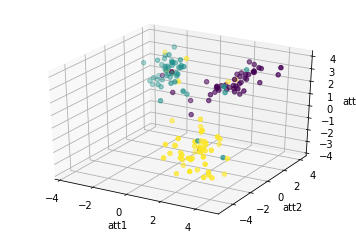

In [90]:
#Dzulfiqar Ridha 1301154298 IF-39-04
import matplotlib.pyplot as plt
import math
import numpy as np
import operator

#load data
data_train = np.genfromtxt("data_train_PNN.txt",skip_header=1)
data_test = np.genfromtxt("data_test_PNN.txt",skip_header=1)

#visualization data train
xyz = plt.figure().add_subplot(111, projection='3d')

xyz.set_xlabel("att1")
xyz.set_ylabel("att2")
xyz.set_zlabel("att3")

xyz.scatter(data_train[:,0], data_train[:,1], data_train[:,2], c=data_train[:,3])

plt.show()

In [91]:
#menghitung PDF
def PDF(test,train,s):
    return math.exp(-((((test[0]-train[0])**2)+((test[1]-train[1])**2)+((test[2]-train[2])**2))/(2*(s)**2)))

In [92]:
#Klasifikasi
def klasifikasi(dtest,dtrain,s):
    kelas = {0:0.0,1:0.0,2:0.0}
    hasil = []
    for test in dtest:
        for train in dtrain:
            kelas[int(train[3])] = kelas[int(train[3])] + PDF(test,train,s)

        hasil.append(max(kelas.iteritems(), key=operator.itemgetter(1))[0])
        kelas = {0:0.0,1:0.0,2:0.0}
    return np.array(hasil)

In [93]:
#menghitung akurasi
def tepat():
    n=0
    smooth = []
    persenan = []
    while n<1:
        n+=0.05
        akurasi = klasifikasi(data_train,data_train,n)
        sum = 0
        for i in range(len(data_train)):
            cek = akurasi[i] == int(data_train[:,3][i])
            if cek:
                sum+=1
        persen = float(sum)/len(data_train)*100
        persenan.append(persen)
        smooth.append(n)
        print "smoothing:",n,", akurasi:",persen
    print "nilai smoothing terbaik:",smooth[persenan.index(max(persenan))],"dengan akurasi: ",max(persenan)
    plt.xlabel("nilai smoothing")
    plt.ylabel("akurasi (%)")
    plt.plot(smooth,persenan)
    plt.show()
    return smooth[persenan.index(max(persenan))]

smoothing: 0.05 , akurasi: 100.0
smoothing: 0.1 , akurasi: 100.0
smoothing: 0.15 , akurasi: 100.0
smoothing: 0.2 , akurasi: 99.3333333333
smoothing: 0.25 , akurasi: 97.3333333333
smoothing: 0.3 , akurasi: 96.0
smoothing: 0.35 , akurasi: 95.3333333333
smoothing: 0.4 , akurasi: 94.0
smoothing: 0.45 , akurasi: 93.3333333333
smoothing: 0.5 , akurasi: 91.3333333333
smoothing: 0.55 , akurasi: 90.0
smoothing: 0.6 , akurasi: 90.0
smoothing: 0.65 , akurasi: 90.0
smoothing: 0.7 , akurasi: 89.3333333333
smoothing: 0.75 , akurasi: 89.3333333333
smoothing: 0.8 , akurasi: 89.3333333333
smoothing: 0.85 , akurasi: 89.3333333333
smoothing: 0.9 , akurasi: 89.3333333333
smoothing: 0.95 , akurasi: 89.3333333333
smoothing: 1.0 , akurasi: 89.3333333333
nilai smoothing terbaik: 0.05 dengan akurasi:  100.0


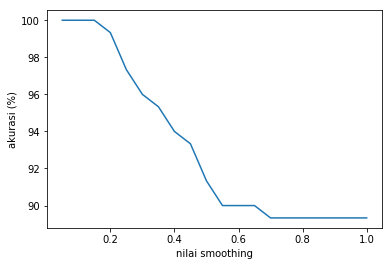

[[ 2.06734516  2.50901315  2.21950748  2.        ]
 [ 1.86886375  1.46963284  2.73425817  0.        ]
 [ 3.29103331  2.39137986  3.33082999  0.        ]
 [ 1.80688944  1.22355699  1.51542821  1.        ]
 [ 3.37502444  1.66065     2.62899099  0.        ]
 [ 0.95547952  2.08006605  1.85863495  0.        ]
 [ 2.70572447  3.0871081   2.80642753  0.        ]
 [-0.92631816  0.56201632  1.40077062  0.        ]
 [ 1.60065326  1.24173171  1.5648026   0.        ]
 [ 2.69827457  2.11052196  2.3310003   0.        ]
 [-2.24645826  2.5504206   2.12905663  1.        ]
 [-0.52363899  0.64053817  2.05012117  1.        ]
 [-1.36027076  0.94961204  1.63663849  1.        ]
 [-0.44420888  0.95146751  2.9509822   1.        ]
 [-1.65761181  1.54041189  1.87596338  1.        ]
 [ 2.74670936 -1.98201862 -1.25797398  2.        ]
 [-1.97592847  1.50950772  1.6103773   1.        ]
 [-2.4826244   3.14696302  1.71758121  1.        ]
 [-1.63992277  3.52936645  3.85961799  1.        ]
 [-1.45345129  0.95719927  0.90

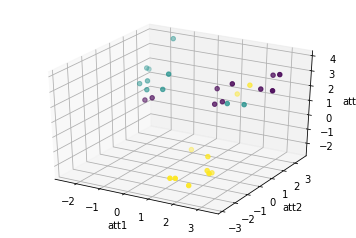

In [95]:
if __name__ == '__main__':
    kelas = np.concatenate((data_test,klasifikasi(data_test,data_train,tepat())[:,None]),axis=1)

    #visualisasi hasil======
    abc = plt.figure().add_subplot(111, projection='3d')

    abc.set_xlabel("att1")
    abc.set_ylabel("att2")
    abc.set_zlabel("att3")

    abc.scatter(kelas[:,0], kelas[:,1], kelas[:,2], c=kelas[:,3])
    plt.show()
    #visualisasi hasil======
    
    f = open('prediksi.txt','w')
    f.write("\n".join(map(lambda x: str(x), kelas)))
    f.close()